**Initial data:**

alfa = 0.5 - infectioning coef

beta = 0.3 - recovering coef

N = 1000000   - all sample of people

S(0)=990000 - initial value for S

I(0)=7000 - initial value for I

R(0)=3000 - initial value for R

t0, tf =  from 0 to 25 days - timeframe

S(t)          -  sample of peaple who have good condition, but could be infected

I(t)          - sample of peaple who are already infected (they are cariess of desise

R(t)          - sample of peaple who have good condition and can`t be effected by desise


**Constrains:**

S(t)+I(t)+R(t) = N

dS/dt = -alfa*S

dI/dt = alfa*S-beta*I

dR/dt = beta*I


**Task: **
1. Solve equation: dS/dt = -alfa*S and plotting function S(t)

2. Solve equation: dI/dt = alfa*S-beta*I and plotting function I(t)

3. Solve equation: dR/dt = beta*I by using equation: S(t)+I(t)+R(t) = N and results of  dS/dt = -alfa*S and dI/dt = alfa*S-beta*I and ploting function R(t) with scipy.interpolate.interp1d.

4. Show 3 plots: S(t),I(t),R(t) on one picture





In [35]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# Parameters

In [36]:
alfa = 0.5  # infection coef
beta = 0.3  # recovering coef
N = 1000000  # total population
S0 = 990000  # initial susceptible population
I0 = 7000  # initial infected population
R0 = 3000  # initial recovered population
t0, tf = 0, 25  # time frame

In [37]:
def total(t,y):
    S = -alfa*y[0]
    I = alfa*y[0] - beta*y[1]
  
    return S, I

In [38]:
sol = solve_ivp(total, [t0, tf], [S0, I0], t_eval=np.linspace(t0, tf, 1000))

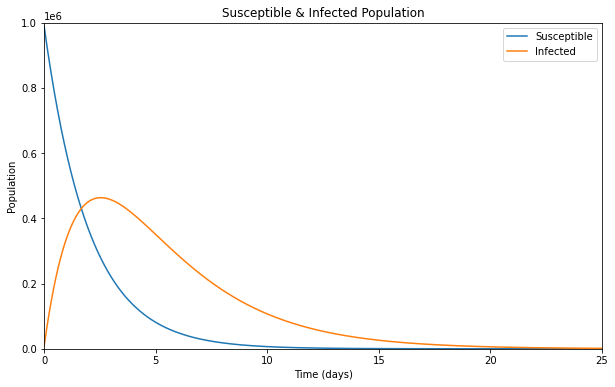

In [39]:
# Plot R(t)
plt.figure(figsize=(10,6))
plt.plot(sol.t, sol.y[0], label='Susceptible')
plt.plot(sol.t, sol.y[1], label='Infected')

plt.xlim(0, 25)
plt.ylim(0, 1000000)
plt.xlabel('Time (days)')
plt.ylabel('Population')
plt.title('Susceptible & Infected Population')
plt.legend()
plt.show()

using the solve_ivp function to solve the differential equation and interpolate the results

In [40]:
from scipy.interpolate import interp1d
S = sol.y[0]
I = sol.y[1]
R = interp1d(sol.t, N - S - I, kind='cubic')

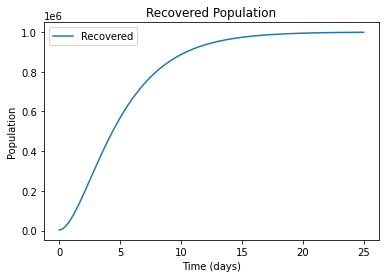

In [41]:
# Plot R(t)

plt.plot(sol.t, R.y, label='Recovered')
plt.xlabel('Time (days)')
plt.ylabel('Population')
plt.title('Recovered Population')
plt.legend()
plt.show()

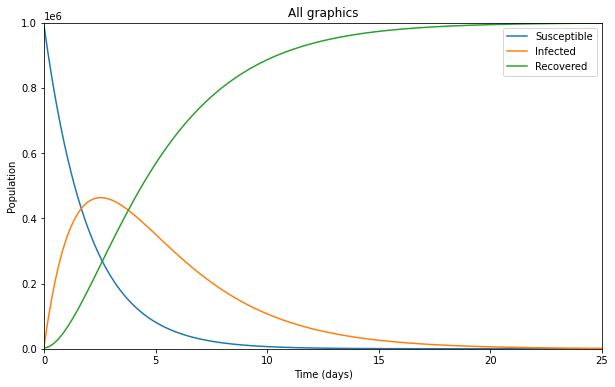

In [42]:
# Plot R(t)
plt.figure(figsize=(10,6))
plt.plot(sol.t, sol.y[0], label='Susceptible')
plt.plot(sol.t, sol.y[1], label='Infected')
plt.plot(sol.t, R.y, label='Recovered')
plt.xlim(0, 25)
plt.ylim(0, 1000000)
plt.xlabel('Time (days)')
plt.ylabel('Population')
plt.title('All graphics')
plt.legend()
plt.show()

Additinal task:

Solve equation: S(t)=S0*e^−αt with scipy.optimize.leastsq data from sol_S

Solve equetion: I(t)=(I0+αS0t)e^−αt with scipy.optimize.leastsq data from sol_I

Solve equetion: R(t) = N-S(t)-I(t)

Show 3 plots: S(t),I(t),R(t) on one picture

Find tmax where I(t)-max with minimize_scalar

Solving: S(t)=S0*e^−αt and predict alfa

In [43]:
from scipy.optimize import leastsq

In [44]:
def residual_S(alpha, t, S0, S):
    S_fit = S0 * np.power(2.71828,(-alpha*t))
    return S_fit - S

In [45]:
alpha0 = 0.1  # initial guess for alpha
t=sol.t
S=sol.y[0]

alpha_opt_S, success = leastsq(residual_S, alpha0, args=(t, S0, S))

In [46]:
alpha_opt_S

array([0.50000088])

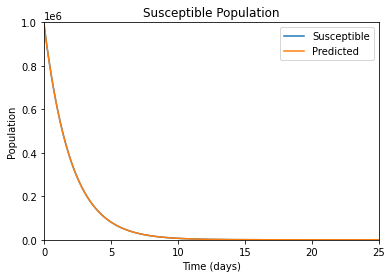

In [47]:
# Plot S(t) real vs pred

S_fit = S0 * np.power(2.71828,(-alpha_opt_S*t))
plt.plot(t, S, label='Susceptible')
plt.plot(t, S_fit, label='Predicted')
plt.xlim(0, 25)
plt.ylim(0, 1000000)
plt.xlabel('Time (days)')
plt.ylabel('Population')
plt.title('Susceptible Population')
plt.legend()
plt.show()

Solving equetion: I(t)=(I0+αS0t)e^−αt

In [48]:
def residual_I(p, t, y):
    I0, alpha = p
    return y - (I0 + alpha*S0*t)*np.exp(-alpha*t)

In [49]:
p0 = [7000, 0.5]

In [50]:
sol_I_values = leastsq(residual_I, p0, args=(sol.t, sol.y[1]))

In [51]:
I0_opt, alpha_opt = sol_I_values[0]

In [52]:
def I(t):
    return (I0_opt + alpha_opt*S0*t)*np.exp(-alpha_opt*t)

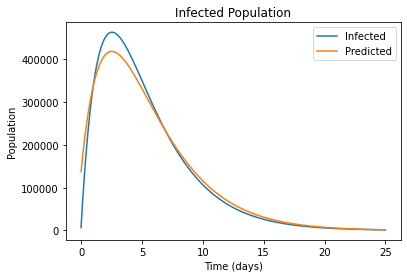

In [53]:
I_fit = I(sol.t)
plt.plot(sol.t, sol.y[1], label='Infected')
plt.plot(sol.t, I_fit, label='Predicted')
plt.xlabel('Time (days)')
plt.ylabel('Population')
plt.title('Infected Population')
plt.legend()
plt.show()

Solving equetion: R(t) = N-S(t)-I(t)

In [54]:
def calc_R(t):
    return N - S_fit - I_fit

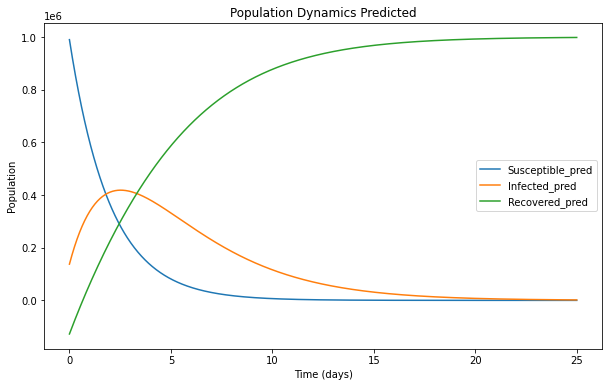

In [55]:
# Calculate R(t)
R = calc_R(t)

# Plot S(t), I(t), R(t)
plt.figure(figsize=(10,6))
plt.plot(t, S_fit, label='Susceptible_pred')
plt.plot(t, I_fit, label='Infected_pred')
plt.plot(t, R, label='Recovered_pred')
plt.xlabel('Time (days)')
plt.ylabel('Population')
plt.title('Population Dynamics Predicted')
plt.legend()
plt.show()

Finding tmax where I(t)-max with minimize_scalar



In [56]:
from scipy.optimize import minimize_scalar

In [57]:
def neg_I(t):
    return -interp1d(sol.t, sol.y[1], kind='cubic')(t)

In [58]:
res = minimize_scalar(neg_I, bounds=(0, tf))
tmax = res.x
Imax = -res.fun
print(f"tmax = {tmax}, Imax = {Imax}")

tmax = 2.537093094011011, Imax = 463321.3670040121
